In [12]:
%matplotlib inline

## Querying the prompt products database
Goal for today: Plotting objects and sources on the sky

In [13]:
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')
import lsst.afw.geom as afwGeom
import lsst.daf.persistence as dafPersist

In [14]:
import os
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
repo = '/epyc/users/mrawls/premap2019/hits-lsst/hits2015/rerun/highres1'
butler = dafPersist.Butler(repo)

In [16]:
dbName = 'association.db'
dbPath = os.path.join(repo, dbName)

In [51]:
connection = sqlite3.connect(dbPath)


We will connect to the prompt products database (called 'association.db') using sqlite , and read the data into panadas so we can do python things with it. There are several tables in this database: 
* DiaForcedSource
* DiaSource
* DiaObject
* PpdbProtoVisits
* DiaObjects_To_Objects_Match
* SSObjects

"Dia" means "Difference Image Analysis." "Ppdb" means "Prompt Products Database." "Forced" refers to forced photometry (even if there is no source detected at a location, maybe there was before, so measure the brightness there anyway. "SS: refers to Solar System and we won't worry about that..

In [44]:
#combining a data set into an array to be read; Incorporating data into a table consisting of only what is read. 
objTable = pd.read_sql_query('select diaObjectId, ra, decl, nDiaSources, gPSFluxMean, validityEnd, flags, gTOTFluxMean, GTOTFluxMeanErr, gPSFluxMeanErr from DiaObject where validityEnd is NULL;', connection)

In [8]:
objTable [:5]

,diaObjectId,ra,decl,nDiaSources,gPSFluxMean,validityEnd,flags,gTOTFluxMean,gTOTFluxMeanErr,gPSFluxMeanErr
0,176486781787570292,151.197871,2.221515,1,NaN,None,1,-20630.955068,NaN,NaN
1,176486781787570326,150.997772,2.329394,1,160.158040,None,1,196.567166,NaN,NaN
2,176486781787570340,151.078542,2.322744,1,10953.513450,None,1,14866.415796,NaN,NaN
3,176486713068093591,149.839390,2.613432,1,2032.066961,None,1,2230.560014,NaN,NaN
4,176486713068093600,149.869474,2.552636,1,NaN,None,1,1788.147560,NaN,NaN


In [9]:
len(objTable)

110157

Text(0.5, 1.0, 'Course overview of where objets are in the sky')

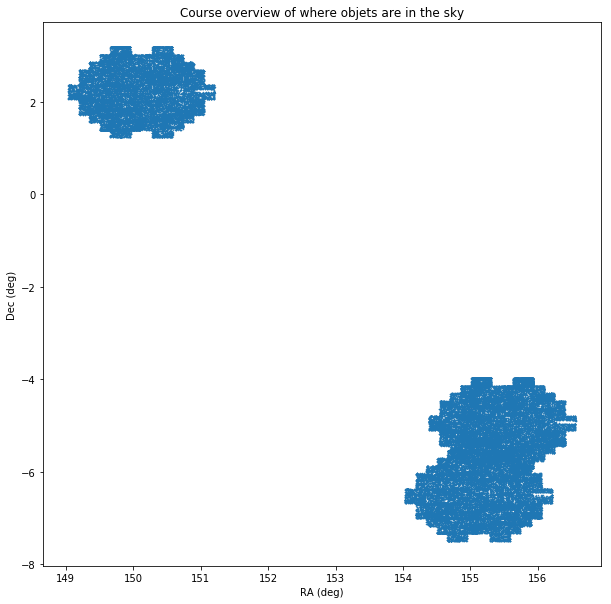

In [32]:
#Here we will visually show where the data captured by the ccd lies in terms of degrees. 
fig = plt.figure(figsize=(10,10))
#RA vs DECL gives the visual layout of the visit...within that shapes appearing include objects.
plt.scatter(objTable['ra'], objTable['decl'], s=1, marker='.')
#labeling axes
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Course overview of where objets are in the sky')

Text(0.5, 1.0, 'Course overview of where objets are in the sky')

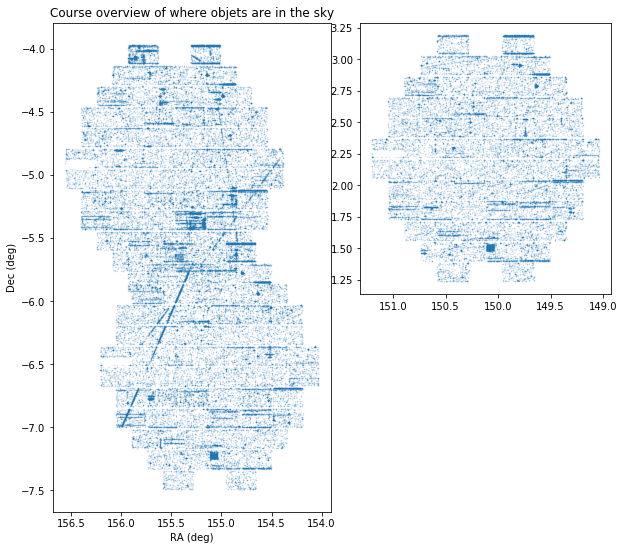

In [11]:
#Here i set the size of the figure
fig = plt.figure(figsize=(10,10))
#Here ax1 and ax2 will add a new set of axes for two graphs
ax1 = plt.subplot2grid((100,100), (0,55), rowspan=50, colspan= 45)
ax2 = plt.subplot2grid((100,100), (0,0), rowspan = 90, colspan= 50)
#Filtering data that is plotted
ax1Filter = (objTable['decl'] > -2)
#inverse of ax1Filter, we do this to filter the data...
ax2Filter = (~ax1Filter)
#creating the scatter plot
scatter1 = ax1.scatter(objTable.loc[ax1Filter,'ra'], objTable.loc[ax1Filter,'decl'], marker= '.', s=0.5, alpha=0.2)
scatter2= ax2.scatter(objTable.loc[ax2Filter,'ra'], objTable.loc[ax2Filter,'decl'], marker= '.', s=0.5, alpha= 0.2)
#invert axises to get the right orientation of the data
ax1.invert_xaxis()
ax2.invert_xaxis()
#here we label our axes
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Course overview of where objets are in the sky')

Text(0, 0.5, 'Dec (deg)')

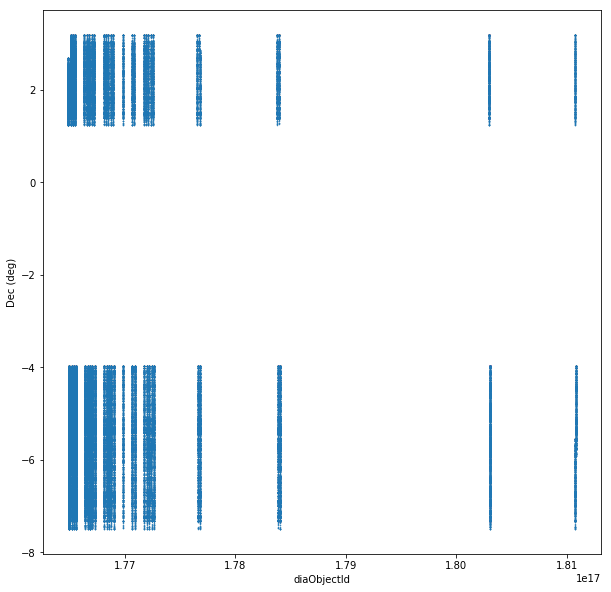

In [40]:
#Here we will visually show where the data captured by the ccd lies in terms of degrees. 
fig = plt.figure(figsize=(10,10))
#RA vs DECL gives the visual layout of the visit...within that shapes appearing include objects.
plt.scatter(objTable['diaObjectId'], objTable['decl'], s=1, marker='.')
#labeling axes
plt.xlabel('diaObjectId')
plt.ylabel('Dec (deg)')


Text(0, 0.5, 'ra(deg)')

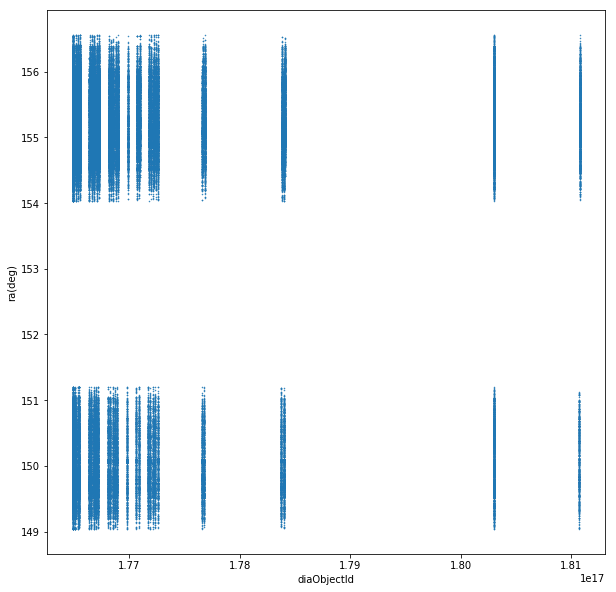

In [39]:
#Here we will visually show where the data captured by the ccd lies in terms of degrees. 
fig = plt.figure(figsize=(10,10))
#RA vs DECL gives the visual layout of the visit...within that shapes appearing include objects.
plt.scatter(objTable['diaObjectId'], objTable['ra'], s=1, marker='.')
#labeling axes
plt.xlabel('diaObjectId')
plt.ylabel('ra(deg)')


Text(0, 0.5, 'gPSFluXMean')

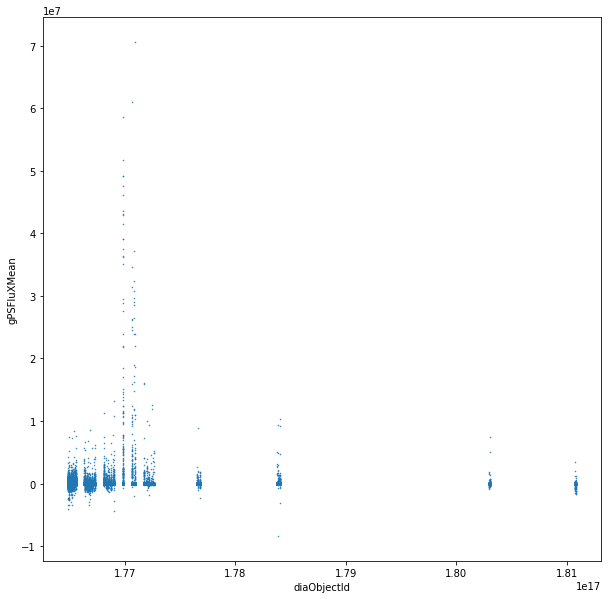

In [38]:
#Here we will visually show where the data captured by the ccd lies in terms of degrees. 
fig = plt.figure(figsize=(10,10))
#RA vs DECL gives the visual layout of the visit...within that shapes appearing include objects.
plt.scatter(objTable['diaObjectId'], objTable['gPSFluxMean'], s=1, marker='.')
#labeling axes
plt.xlabel('diaObjectId')
plt.ylabel('gPSFluXMean')


Text(0, 0.5, 'gTOTFluxMeanErr')

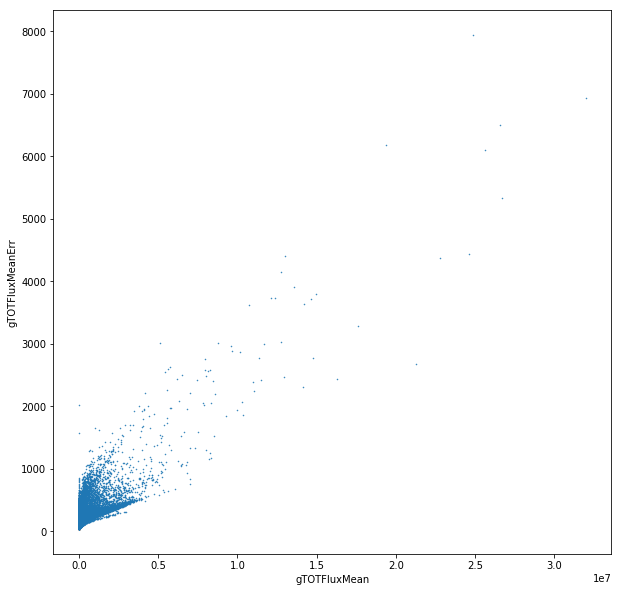

In [42]:
#Here we will visually show where the data captured by the ccd lies in terms of degrees. 
fig = plt.figure(figsize=(10,10))
#RA vs DECL gives the visual layout of the visit...within that shapes appearing include objects.
plt.scatter(objTable['gTOTFluxMean'], objTable['gTOTFluxMeanErr'], s=1, marker='.')
#labeling axes
plt.xlabel('gTOTFluxMean')
plt.ylabel('gTOTFluxMeanErr')


AttributeError: module 'pandas' has no attribute 'loc'